In [1]:
import pandas as pd
import numpy as np
import os
import pyarrow.parquet as pq
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio
import plotly.subplots as sp

In [2]:
df = pd.read_parquet('air_quality_data_2024.parquet')
df.drop(columns=['year'], inplace=True)

In [3]:
columns = df.columns
print(columns)

Index(['DUEXTTAU', 'BCFLUXU', 'OCFLUXV', 'BCANGSTR', 'SUFLUXV', 'SSSMASS25',
       'SSSMASS', 'OCSMASS', 'BCCMASS', 'BCSMASS', 'SO4CMASS', 'SSFLUXU',
       'DUCMASS', 'SSEXTTAU', 'SO2CMASS', 'DUSCATAU', 'OCANGSTR', 'OCCMASS',
       'TOTEXTTAU', 'DUSCAT25', 'TOTANGSTR', 'DMSCMASS', 'SSEXTT25',
       'DUANGSTR', 'DMSSMASS', 'BCEXTTAU', 'SSSCATAU', 'DUFLUXV', 'DUFLUXU',
       'SUEXTTAU', 'SSFLUXV', 'BCSCATAU', 'DUCMASS25', 'OCEXTTAU', 'SUANGSTR',
       'SSSCAT25', 'SSCMASS25', 'SO4SMASS', 'DUSMASS', 'SUFLUXU', 'BCFLUXV',
       'DUSMASS25', 'SSCMASS', 'SUSCATAU', 'SO2SMASS', 'SSANGSTR', 'DUEXTT25',
       'OCFLUXU', 'OCSCATAU', 'TOTSCATAU', 'PM25_MERRA2', 'PM25_ug_m3',
       'class', 'location', 'month', 'day', 'hour'],
      dtype='object')


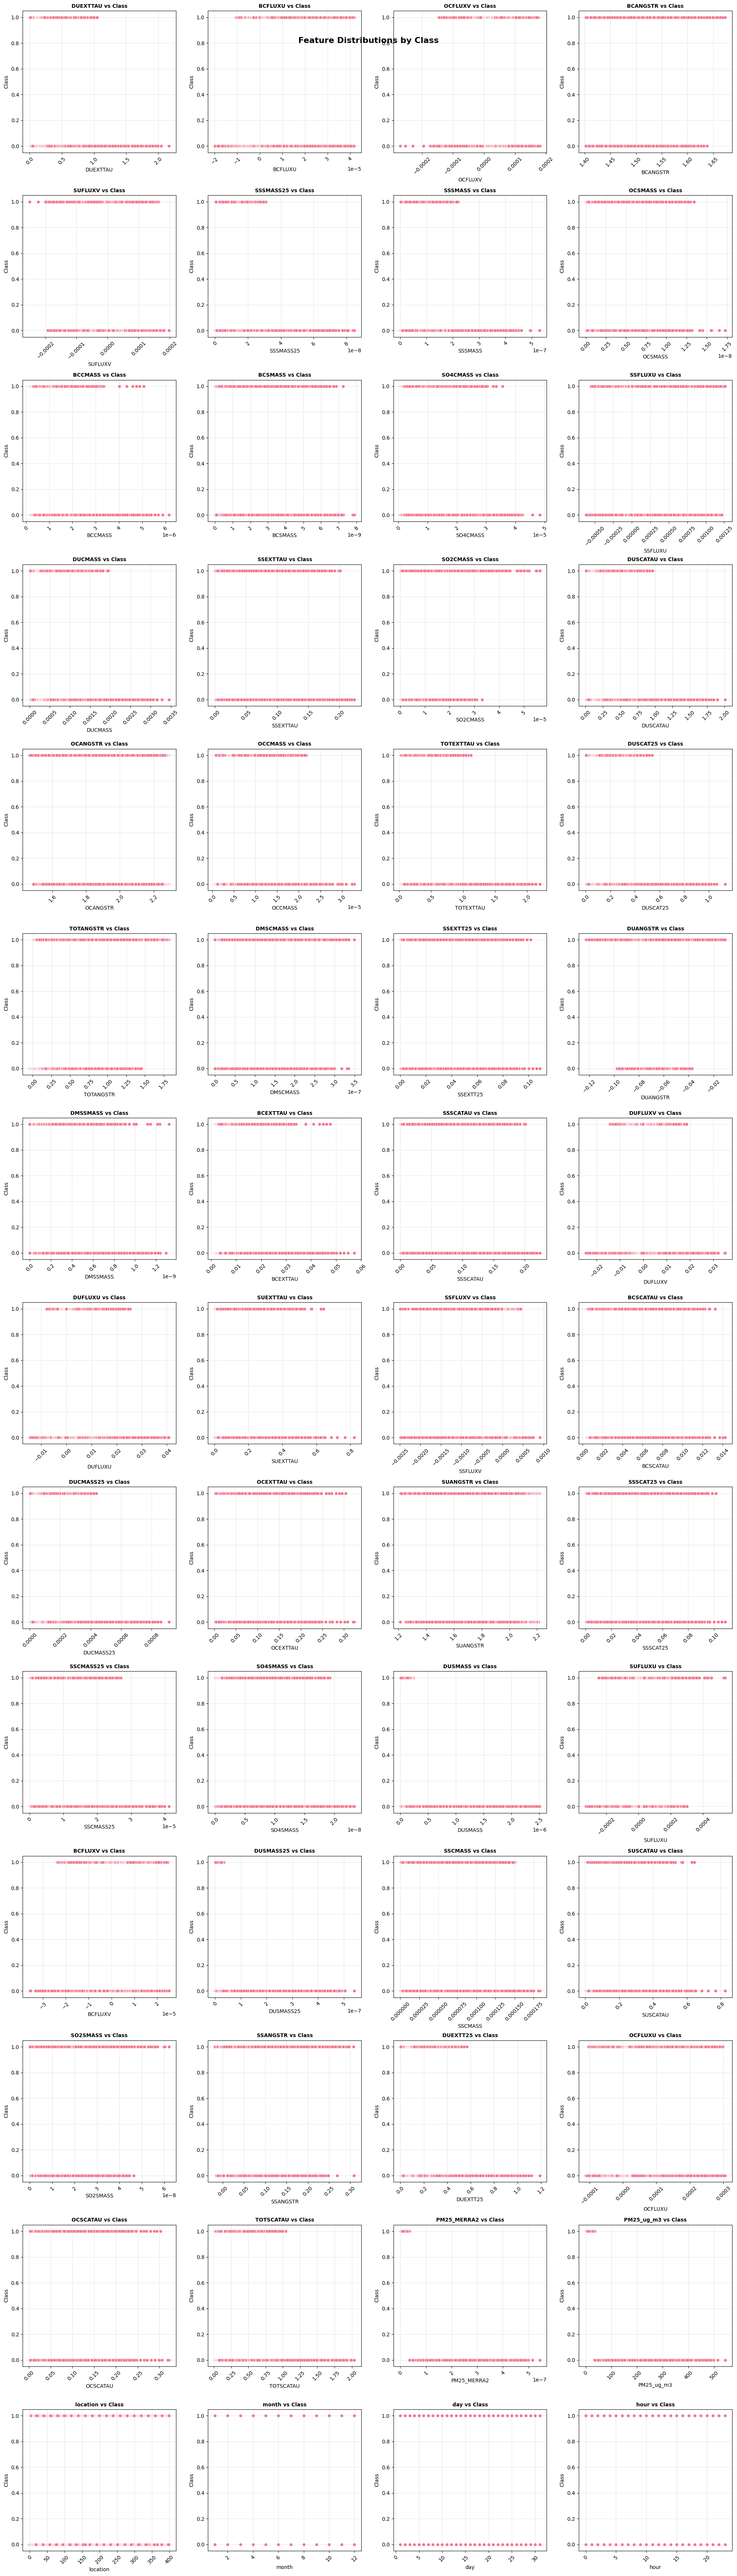

Top 10 features most correlated with class:
class          1.000000
PM25_ug_m3     0.658273
PM25_MERRA2    0.658273
DUSMASS25      0.639955
DUSMASS        0.636472
DUCMASS        0.488354
TOTANGSTR      0.482774
DUEXTTAU       0.472132
DUSCATAU       0.471441
DUCMASS25      0.465035
DUEXTT25       0.463650
Name: class, dtype: float64


In [7]:
# Get numerical features (exclude non-numerical columns)
numerical_features = df.select_dtypes(include=[np.number]).columns.tolist()
numerical_features = [col for col in numerical_features if col != 'class']

# Set up the plotting style
plt.style.use('default')
sns.set_palette("husl")

# Calculate number of rows and columns for subplots
n_features = len(numerical_features)
n_cols = 4
n_rows = (n_features + n_cols - 1) // n_cols

# Create subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 5*n_rows))
fig.suptitle('Feature Distributions by Class', fontsize=16, fontweight='bold')

# Flatten axes array for easier indexing
if n_rows == 1:
    axes = axes.reshape(1, -1)
axes = axes.flatten()

# Plot each feature
for i, feature in enumerate(numerical_features):
    ax = axes[i]
    
    # Create box plot
    sns.scatterplot(data=df, y='class', x=feature, ax=ax)
    ax.set_title(f'{feature} vs Class', fontsize=10, fontweight='bold')
    ax.set_ylabel('Class')
    ax.set_xlabel(feature)
    ax.tick_params(axis='x', rotation=45)
    
    # Add some styling
    ax.grid(True, alpha=0.3)

# Hide empty subplots
for i in range(len(numerical_features), len(axes)):
    axes[i].set_visible(False)

plt.tight_layout()
plt.show()


correlation_matrix = df[numerical_features + ['class']].corr()
class_correlations = correlation_matrix['class'].abs().sort_values(ascending=False)
print("Top 10 features most correlated with class:")
print(class_correlations.head(11))  # 11 to include class itself

In [10]:
selected_columns = list(class_correlations.head(5).index) + ['location', 'month', 'day', 'hour']
df_final = df[selected_columns]
df_final.head()

,class,PM25_ug_m3,PM25_MERRA2,DUSMASS25,DUSMASS,location,month,day,hour
0,1,33.674194,3.367419e-08,2.689194e-08,9.289943e-08,0,1,1,0
1,1,28.773205,2.877320e-08,2.286106e-08,7.942435e-08,20,1,1,0
2,1,20.960495,2.096050e-08,1.652370e-08,5.983748e-08,40,1,1,0
3,1,16.345709,1.634571e-08,1.275839e-08,4.882168e-08,60,1,1,0
4,1,15.049562,1.504956e-08,1.193985e-08,4.988397e-08,80,1,1,0


In [11]:
df_final.to_parquet('air_quality_2024_preproccessed.parquet', index=False)